<h1>Histograms</h1>
<p>...</p>

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

<h3><b>Adjustable parameters</b></h3> 
<ul>
    <li><code>PATH</code> - The folder where the energy data files are located</li>
    <li><code>nflds</code> - The number of fields</li>
    <li><code>fld_names</code> - The name of each field</li>
    <li><code>start</code> - the time index to start plotting on</li>
    <li><code>end</code> - the time index to end plotting on. Set to -1 to make end=numtimes.</li>
     <li><code>skip</code> - how many time values to skip between plots</li>
    <li><code>field_range</code> - range of field values to plot</li>
</ul>

In [2]:
PATH = "/home/reagan/Documents/latticeeasy2.1/"
nflds = 2
fld_names = ["Φ", "χ"]
start = 0
end = -1
skip = 1
field_range = [-2,2]

<h2>Load data</h2>

In [3]:
with open(PATH + "histogramtimes_0.dat") as hist_times_file :
    lines = hist_times_file.readlines()
    stripped = [line.strip("\n") for line in lines if not line == "\n"]
    
    
    times = [float(line.split(" ")[0]) for line in stripped]
    numtimes = len(times)
    mins = [[] for i in range(nflds)]
    spacings = [[] for i in range(nflds)]
    
    for i in range(nflds) :
        for line in stripped :
            split = line.split(" ")
            mins[i].append(float(split[1 + i*nflds]))
            spacings[i].append(float(split[2 + i*nflds]))
    
hist_data = [[] for i in range(nflds)]
for i in range(nflds):
    with open(PATH + "histogram" + str(i) + "_0.dat") as hist_file :
        lines = hist_file.readlines()
        stripped = [line.strip("\n") for line in lines if not line == "\n"]
        
        hist_data[i] = [float(val) for val in stripped]

nbins = len(hist_data[0]) // numtimes
#TODO: error checking

<h2>Output</h>

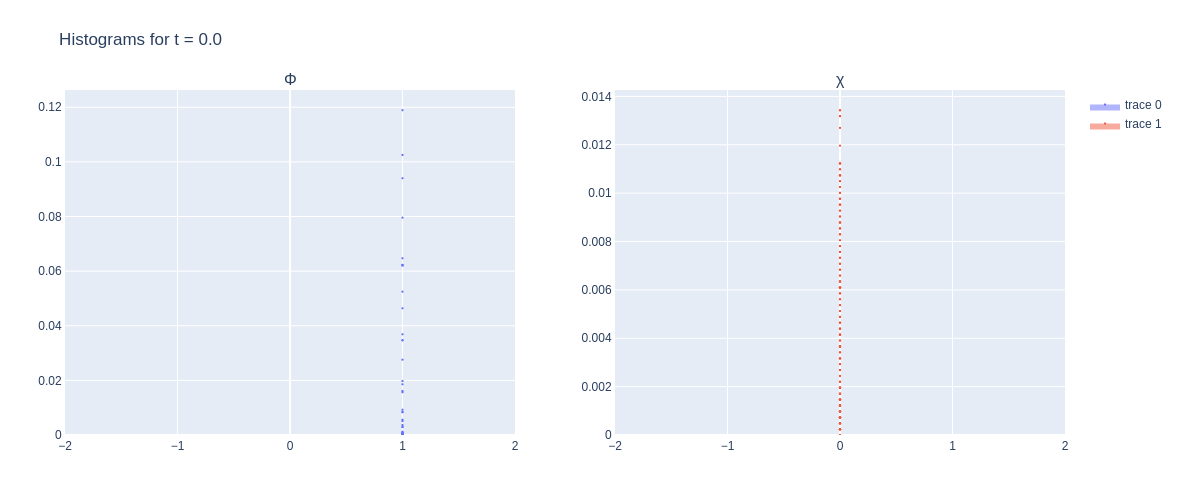

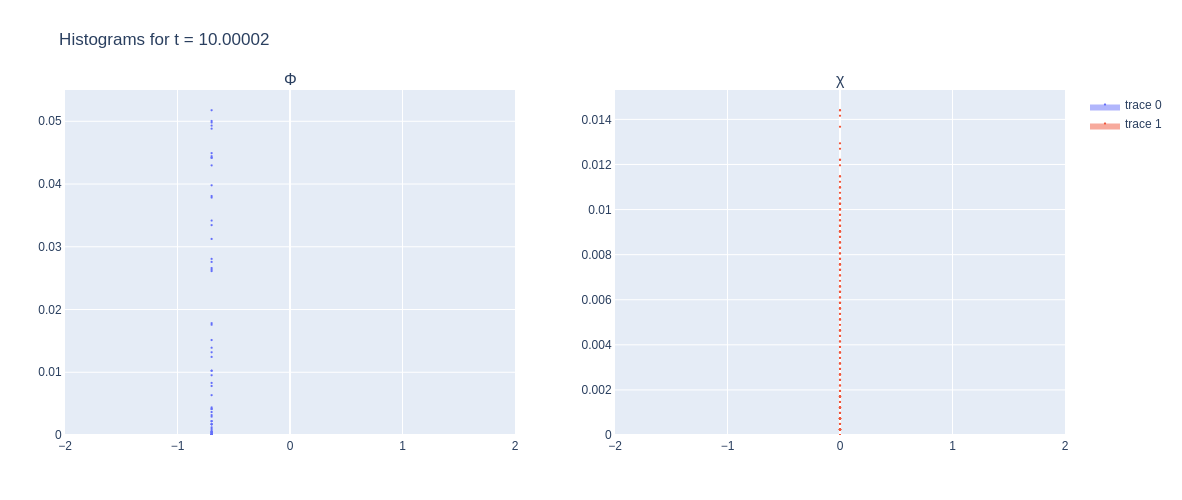

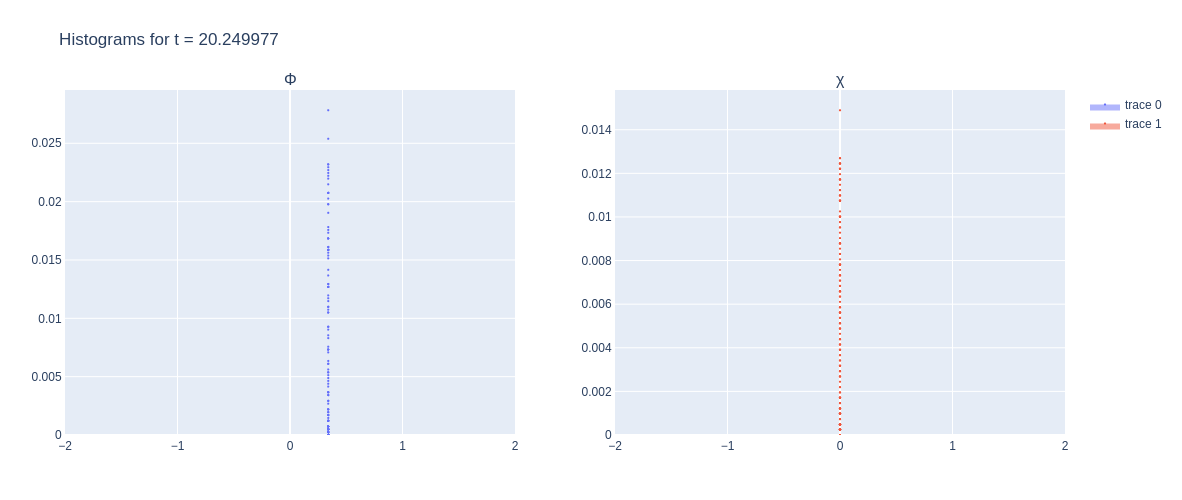

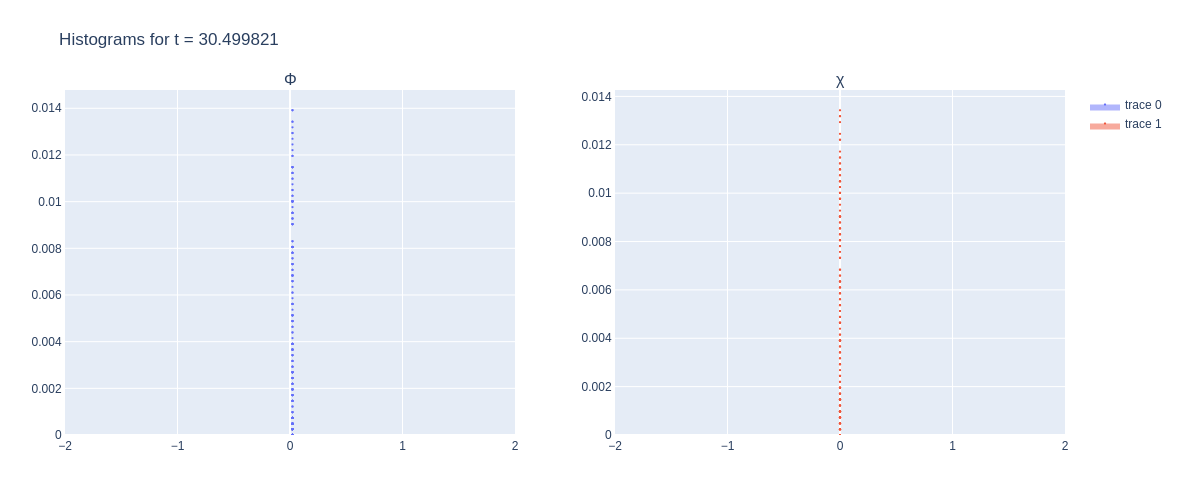

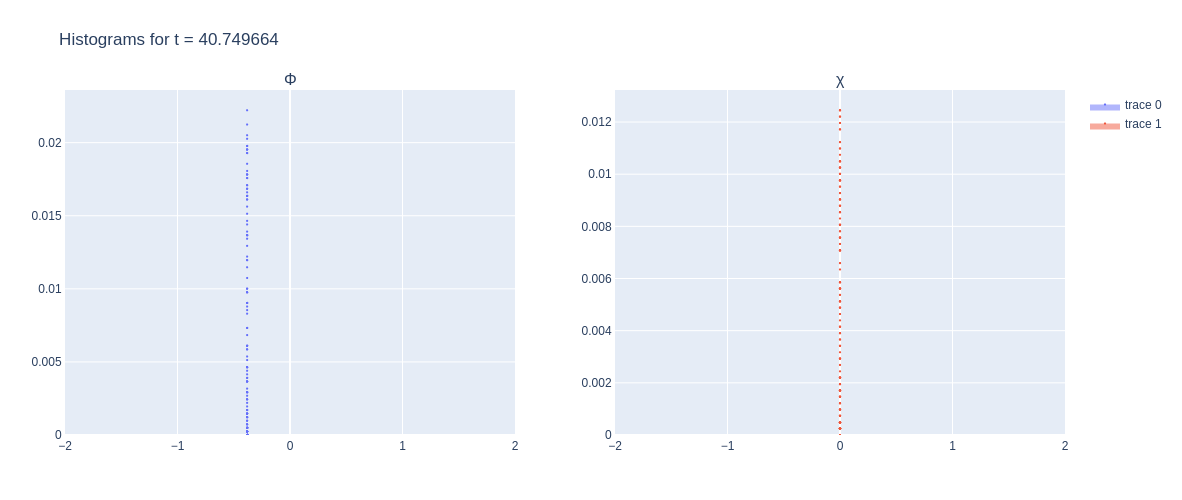

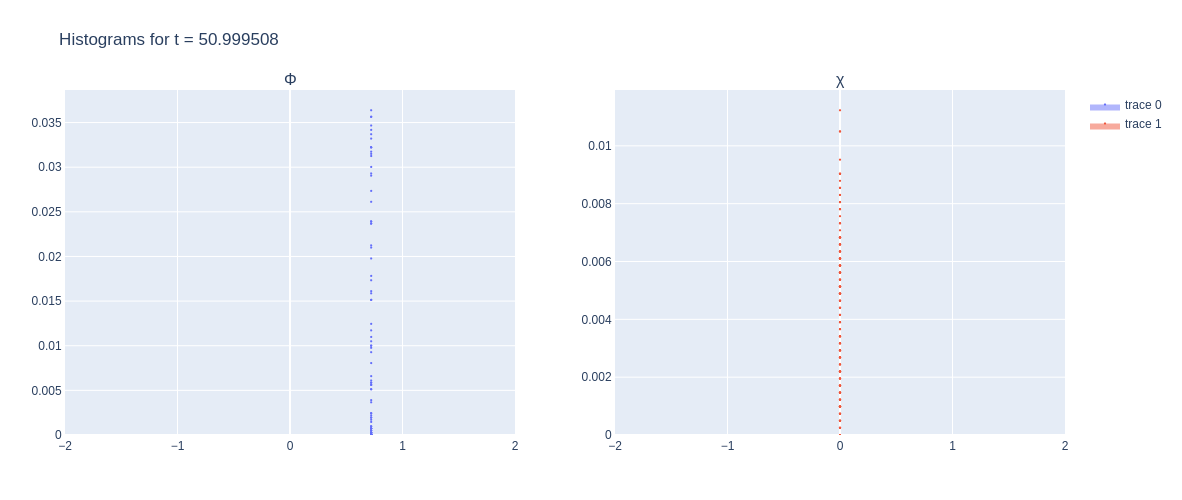

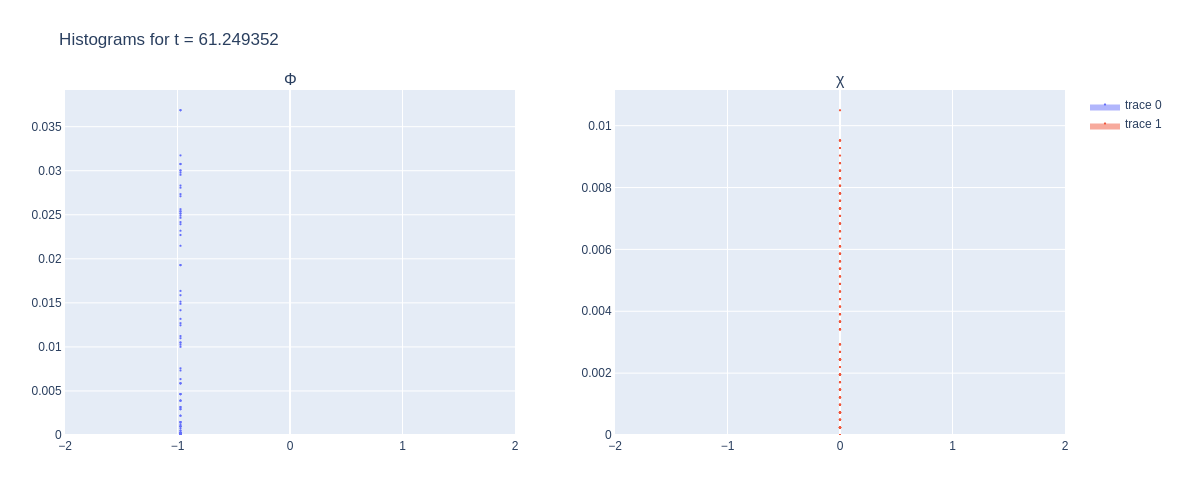

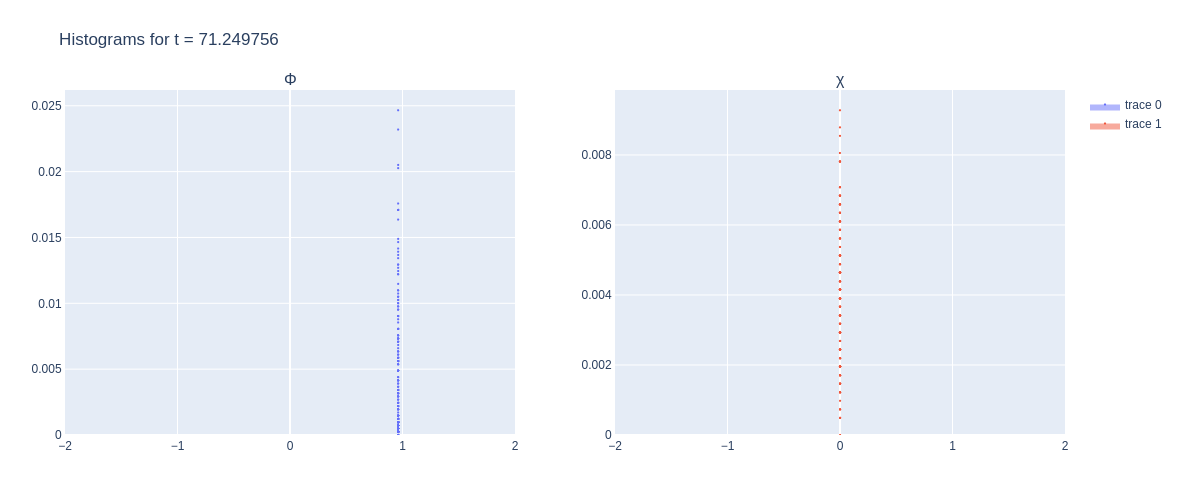

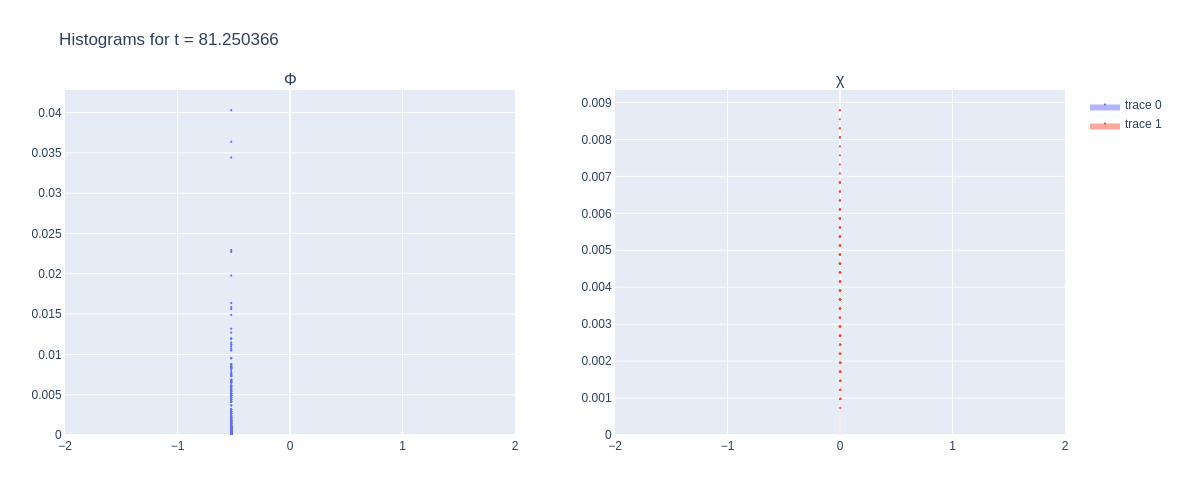

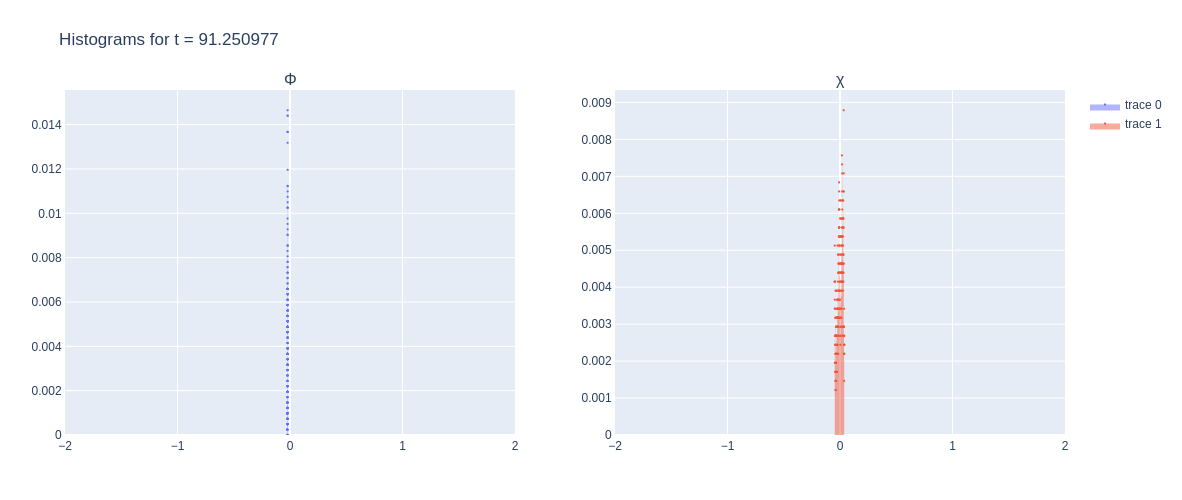

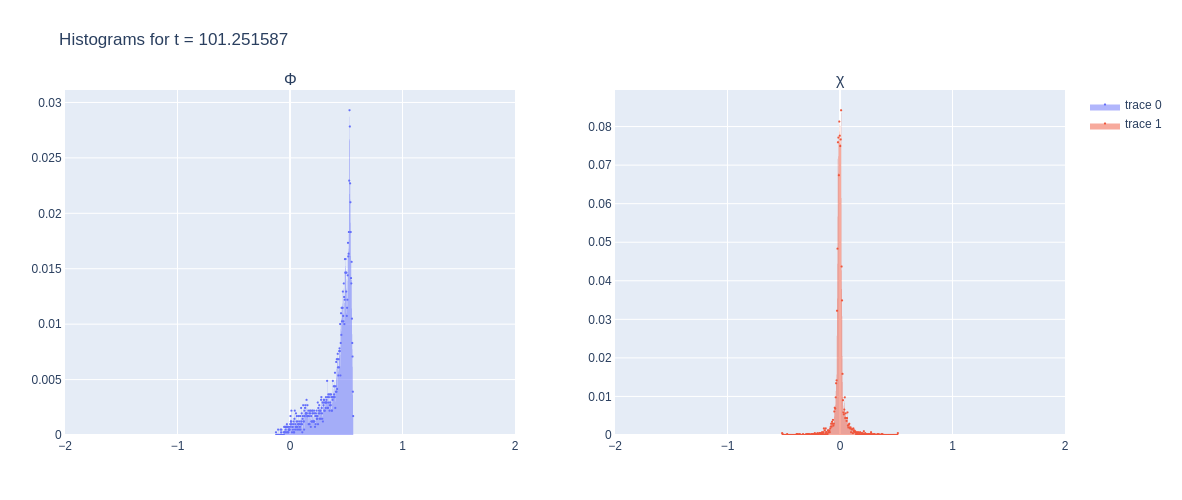

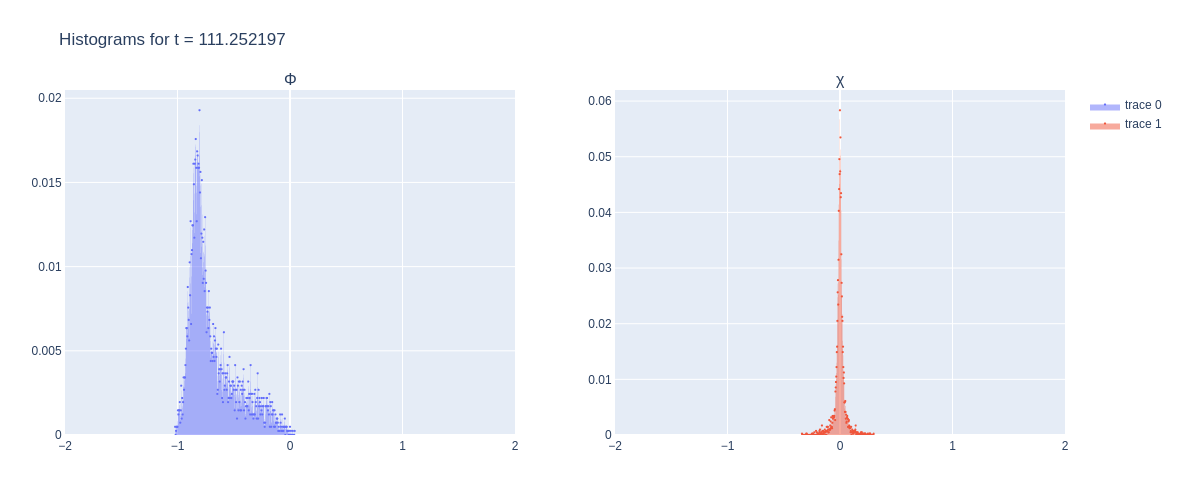

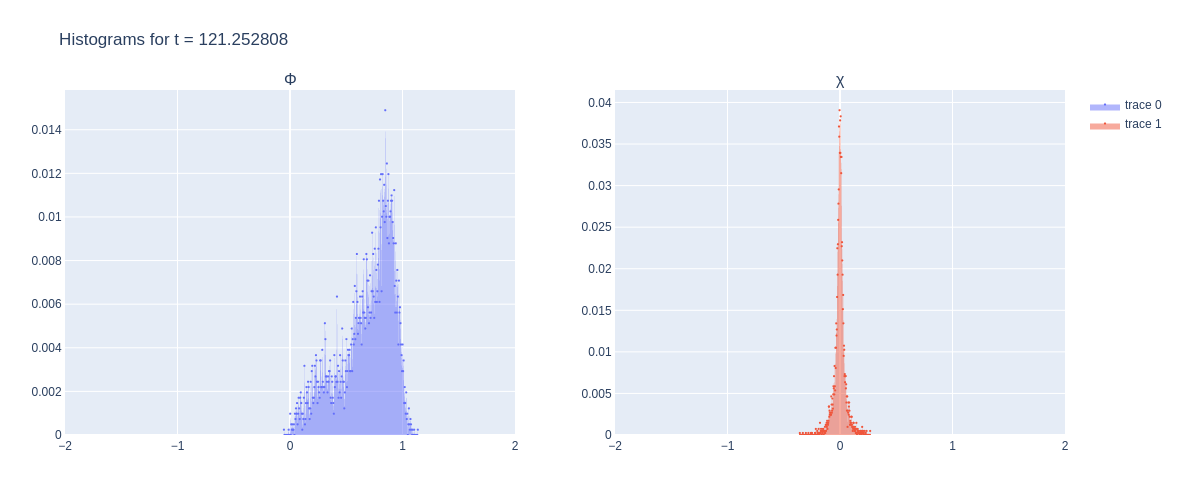

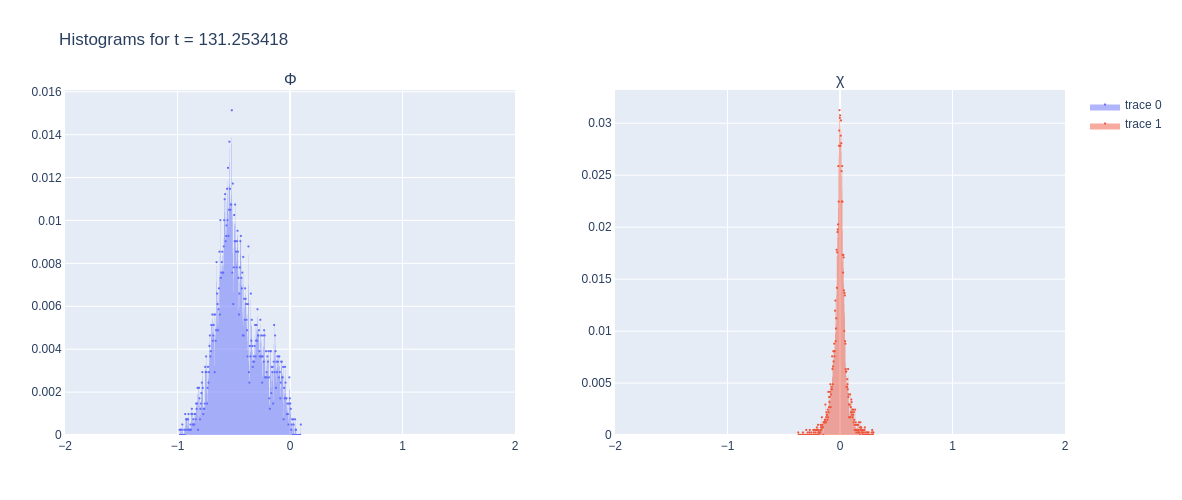

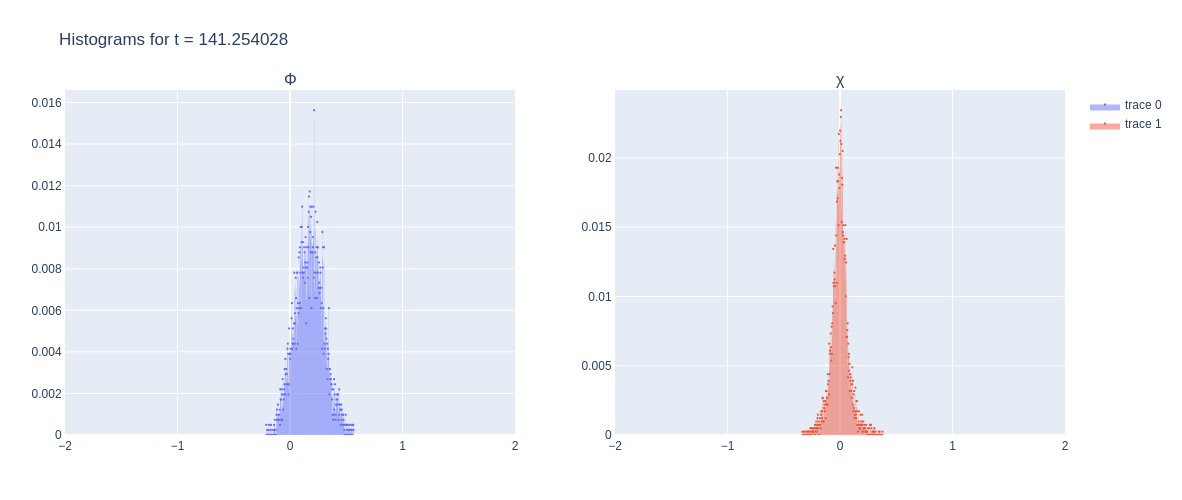

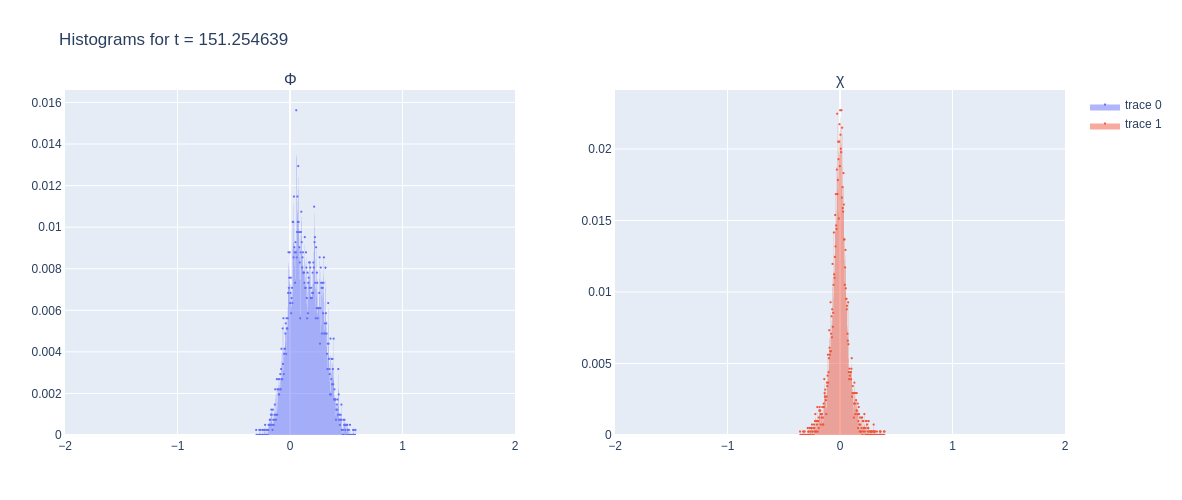

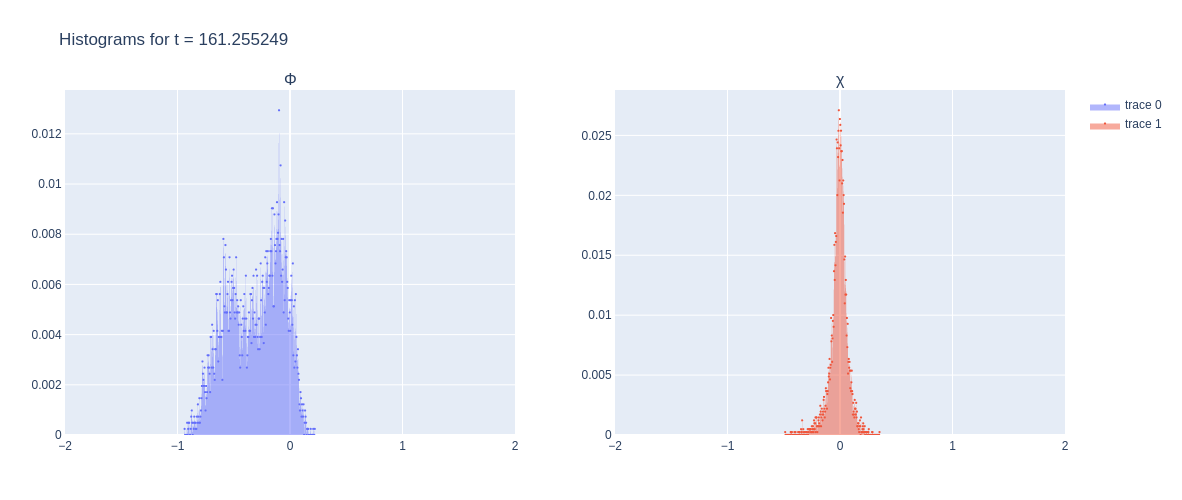

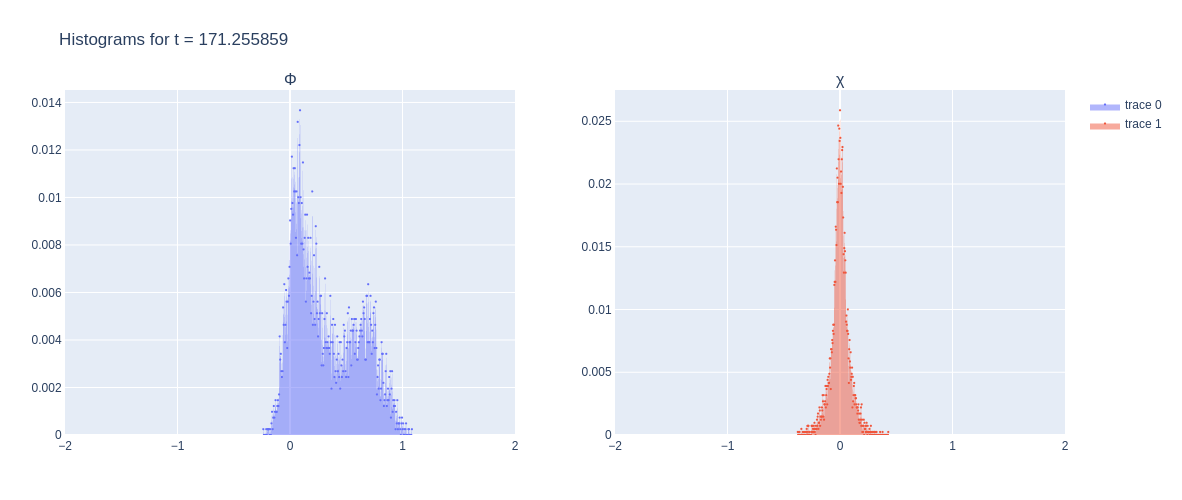

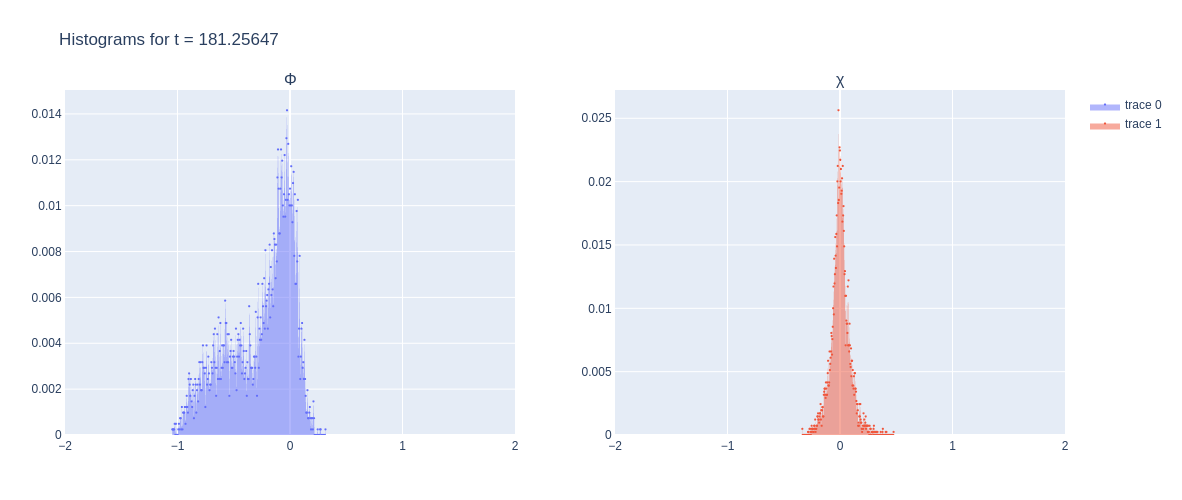

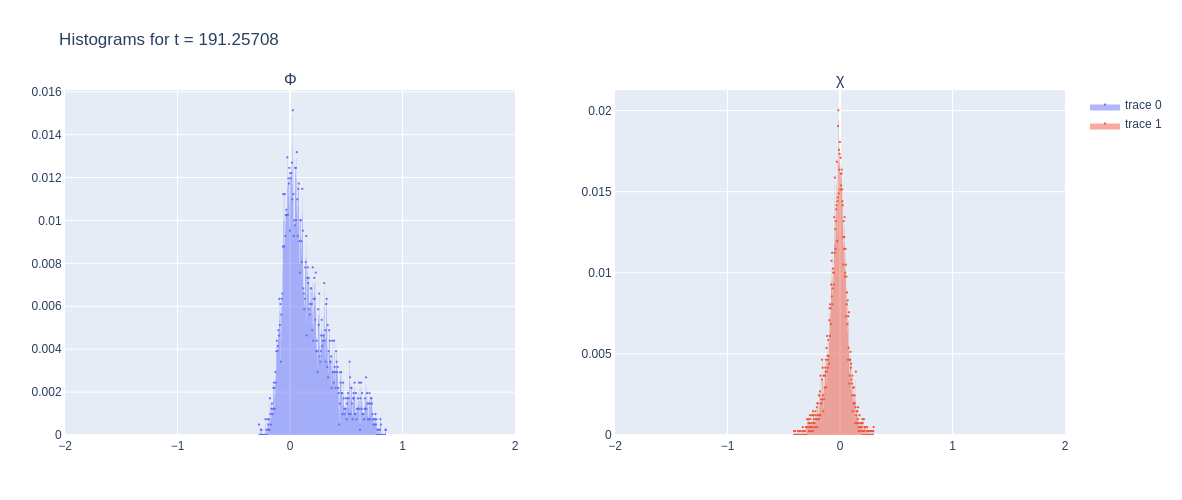

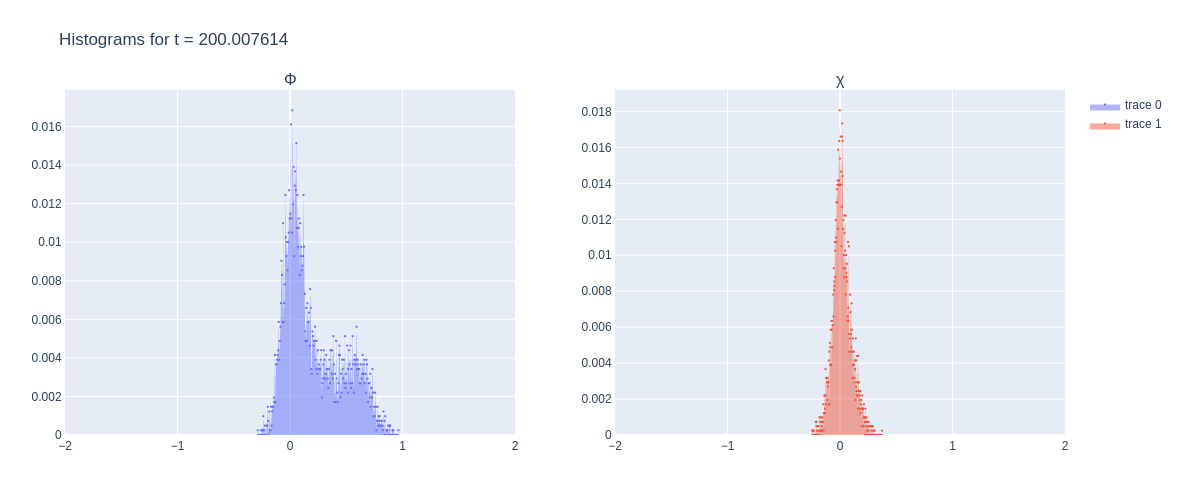

In [4]:
if end == -1 :
    end = numtimes

for time in range(start, end, skip) :
    
    curr_plot = make_subplots(rows = 1, cols = nflds, subplot_titles = fld_names)
    for fld in range(nflds):
        x = [mins[fld][time] + j*spacings[fld][time] for j in range(nbins)]
        y = [hist_data[fld][j + nbins * time] for j in range(nbins)]
        curr_plot.append_trace(go.Scatter(x=x, y=y,  mode='markers', fill='tozeroy', marker = dict(size=2)), row=1,col=fld+1)
        curr_plot.update_xaxes(row=1, col=fld+1, range = field_range)
    
    curr_plot.update_layout(autosize=False,
    width=500*nflds, height=500, title_text="Histograms for t = " + str(times[time]),
    margin=dict(l=65, r=50, b=65, t=90),)
    curr_plot.show()          